In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('C:\\Users\\krishna\\AppData\\Local\\Temp\\Temp1_graduate-admissions.zip\\Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
del df['Serial No.']

In [16]:
x=df.iloc[:,:-1].values

In [17]:
y=df.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x1_train=ss.fit_transform(x_train)
x1_test=ss.transform(x_test)

In [31]:
dfs=pd.DataFrame(data=x1_train,columns=['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research'])
dfs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.282701,-0.552739,-0.096928,-0.422790,-1.094760,-0.070169,0.886405
1,-0.140504,-0.067880,-0.952174,0.538097,-0.543706,-0.184842,0.886405
2,-0.479069,-0.067880,0.758318,1.018540,1.109455,0.634250,0.886405
3,-1.664045,-1.199216,-1.807420,-1.864121,-1.645814,-1.167752,-1.128152
4,0.367343,0.578598,-0.096928,-0.903234,-0.543706,0.470432,0.886405
...,...,...,...,...,...,...,...
295,-0.986916,-0.875977,-0.952174,-1.383678,-1.094760,-0.709060,-1.128152
296,0.451984,1.063456,1.613564,1.018540,0.558401,0.535959,0.886405
297,-2.256533,-0.552739,0.758318,-1.383678,-1.094760,-1.888552,-1.128152
298,1.890883,1.871553,1.613564,1.018540,0.558401,1.780978,-1.128152


In [23]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x1_train,y_train)
pred=sgd.predict(x1_test)
pred

array([0.69418705, 0.69241069, 0.77835464, 0.61108268, 0.71128083,
       0.59809228, 0.69934858, 0.64720793, 0.86916627, 0.91714608,
       0.53079071, 0.88360107, 0.71363835, 0.46522579, 0.85207526,
       0.6134993 , 0.62114768, 0.80514561, 0.59086173, 0.72757776,
       0.8830123 , 0.84533496, 0.64820534, 0.45418038, 0.78582765,
       0.58046608, 0.49606648, 0.64463528, 0.89904261, 0.65569014,
       0.63514384, 0.74094887, 0.74165271, 0.54362291, 0.78394185,
       0.77264608, 0.66676351, 0.85469235, 0.62397434, 0.92508653,
       0.72972691, 0.66976791, 0.71844456, 0.8038283 , 0.82712765,
       0.67275918, 0.57514239, 0.69928054, 0.60184796, 0.59211909,
       0.66224727, 0.79231888, 0.64131443, 0.8890845 , 0.71381106,
       0.74819492, 0.74389158, 0.73896709, 0.76452998, 0.82917124,
       0.75658293, 0.45833634, 0.63021654, 0.5189231 , 0.84007596,
       0.80687194, 0.7302223 , 0.86762309, 0.76209602, 0.74141265,
       0.60019705, 0.82836852, 0.80881193, 0.61857555, 0.92792

In [33]:
new=sgd.predict(ss.fit_transform([[0.18,-0.2,-0.06,-0.58,-1.5,-0.05,0.10]]))
new

array([0.72292887])

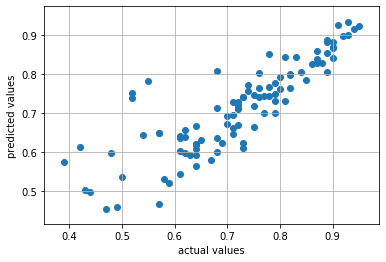

In [30]:
plt.scatter(y_test,pred)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.grid()
plt.show()

In [24]:
from sklearn.metrics import *
from numpy import sqrt

In [25]:
rmse=sqrt(mean_squared_error(y_test,pred))
rmse

0.06856804196513905

In [26]:
mae=mean_absolute_error(y_test,pred)
mae

0.04920448551598968

In [27]:
accuracy=r2_score(y_test,pred)
accuracy*100

73.05889140165944